In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model=keras.Sequential(
[
    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10,activation="softmax"),
    
])

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

#Scale the images to [0,1] range
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

#Add a channel dimension to the images
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

#Split the training set into training and validationsets
x_train,x_val=x_train[:50000],x_train[50000:]
y_train,y_val=y_train[:50000],y_train[50000:]

In [5]:
datagen=ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,         
)

In [6]:
#without data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history1=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2310 - accuracy: 0.9345 - val_loss: 0.1003 - val_accuracy: 0.9731
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.9748 - val_loss: 0.0810 - val_accuracy: 0.9780
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0644 - accuracy: 0.9802 - val_loss: 0.0709 - val_accuracy: 0.9785
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0528 - accuracy: 0.9838 - val_loss: 0.0748 - val_accuracy: 0.9803
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0445 - accuracy: 0.9865 - val_loss: 0.0716 - val_accuracy: 0.9788


In [7]:
#with data augmentation
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history2=model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=5,validation_data=(x_val,y_val))

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3067 - accuracy: 0.9091 - val_loss: 0.0909 - val_accuracy: 0.9745
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2064 - accuracy: 0.9369 - val_loss: 0.0780 - val_accuracy: 0.9773
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1842 - accuracy: 0.9431 - val_loss: 0.1015 - val_accuracy: 0.9726
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1648 - accuracy: 0.9504 - val_loss: 0.1111 - val_accuracy: 0.9679
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1531 - accuracy: 0.9534 - val_loss: 0.1421 - val_accuracy: 0.9614


In [8]:
#without data augmentation
model.evaluate(x_test,y_test)

#with data augmentation
model.evaluate(x_test,y_test)            


313/313 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9637


[0.1286708116531372, 0.963699996471405]

<function matplotlib.pyplot.show(close=None, block=None)>

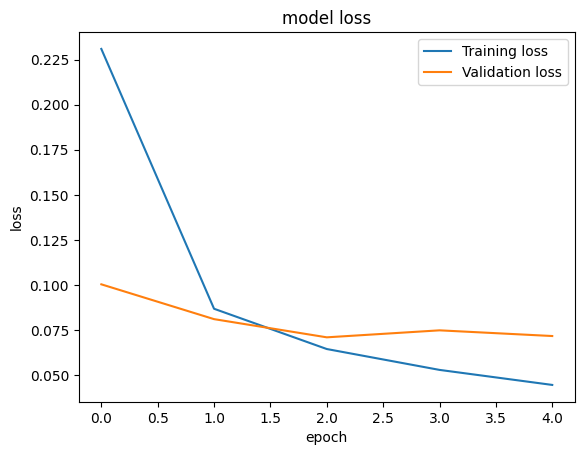

In [9]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],label="Training loss")
plt.plot(history1.history['val_loss'],label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

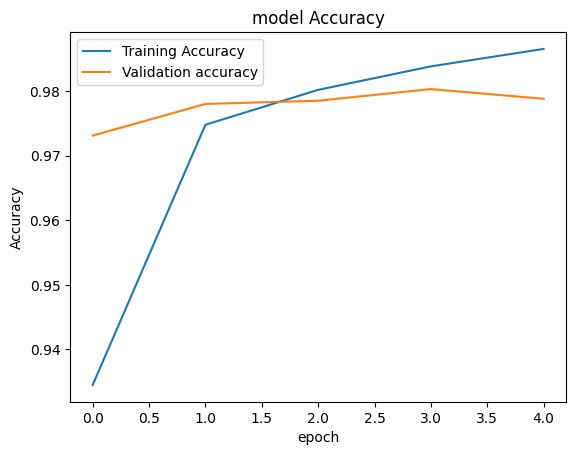

In [10]:
plt.plot(history1.history['accuracy'],label="Training Accuracy")
plt.plot(history1.history['val_accuracy'],label='Validation accuracy')
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show